<a href="https://colab.research.google.com/github/Temesgenasmamaw/NLP/blob/main/sem_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import library

In [1]:
import cv2
import numpy as np
import seaborn as sns
from os import listdir
import tensorflow as tf
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
# from tensorflow.keras.utils import img_to_array
# from keras_preprocessing.image import img_to_array
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,InputLayer,Flatten, Dropout, Dense,Activation

### Installing packages

In [3]:
!pip install split-folders #for spliting dataset with a given ratio
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Variables

In [4]:
import splitfolders
IMAGE_SIZE = 256
BATCH_SIZE =8
EPOCHS = 60
CHANNELS=3
LR = 1e-4


In [5]:
disease_name=['Anthracnose','Healthy','Not Mango','Powdery Mildew','White Scale']
disease_name

['Anthracnose', 'Healthy', 'Not Mango', 'Powdery Mildew', 'White Scale']

### All class at same time

In [6]:

# import Augmentor
# for i in disease_name:
#     Image_Generator = Augmentor.Pipeline('/content/drive/MyDrive/Semester mango/' + i, output_directory='/content/drive/MyDrive/Augmented/'+i)
#     Image_Generator.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     Image_Generator.flip_top_bottom(probability=0.8)
#     Image_Generator.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
#     Image_Generator.shear(probability=0.5, max_shear_left=10, max_shear_right=10)
#     Image_Generator.flip_left_right(probability=0.5)
#     Image_Generator.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

#     Image_Generator.sample(500)

## augumentation for each class

### Anthracnose

In [ ]:
import Augmentor

Image_Generator = Augmentor.Pipeline('/content/drive/MyDrive/Semester mango/Anthracnose', output_directory='/content/drive/MyDrive/Augumented/Anth/')
Image_Generator.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
Image_Generator.flip_top_bottom(probability=0.8)
Image_Generator.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
Image_Generator.shear(probability=0.5, max_shear_left=10, max_shear_right=10)
Image_Generator.flip_left_right(probability=0.5)
Image_Generator.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

Image_Generator.sample(400)

Initialised with 277 image(s) found.
Output directory set to /content/drive/MyDrive/Augumented/Anth/.

Processing <PIL.Image.Image image mode=RGBA size=703x1319 at 0x7F175A81F460>: 100%|██████████| 400/400 [03:40<00:00,  1.82 Samples/s]


### Healthy

In [ ]:
import Augmentor

Image_Generator = Augmentor.Pipeline('/content/drive/MyDrive/Semester mango/Healthy', output_directory='/content/drive/MyDrive/Augumented/Healthy/')
Image_Generator.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
Image_Generator.flip_top_bottom(probability=0.8)
Image_Generator.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
Image_Generator.shear(probability=0.5, max_shear_left=10, max_shear_right=10)
Image_Generator.flip_left_right(probability=0.5)
Image_Generator.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

Image_Generator.sample(400)

Initialised with 206 image(s) found.
Output directory set to /content/drive/MyDrive/Augumented/Healthy/.

Processing <PIL.Image.Image image mode=RGBA size=1468x799 at 0x7F175A003AC0>: 100%|██████████| 400/400 [16:19<00:00,  2.45s/ Samples]


### Powdery Mildew

In [10]:
import Augmentor

Image_Generator = Augmentor.Pipeline('/content/drive/MyDrive/Semester mango/Powdery Mildew', output_directory='/content/drive/MyDrive/Augumented/Powdery/')
Image_Generator.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
Image_Generator.flip_top_bottom(probability=0.8)
Image_Generator.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
Image_Generator.shear(probability=0.5, max_shear_left=10, max_shear_right=10)
Image_Generator.flip_left_right(probability=0.5)
Image_Generator.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

Image_Generator.sample(400)

Initialised with 33 image(s) found.
Output directory set to /content/drive/MyDrive/Augumented/Powdery/.

Processing <PIL.Image.Image image mode=RGB size=4080x2296 at 0x7F2A12BB6A00>: 100%|██████████| 400/400 [14:39<00:00,  2.20s/ Samples]


### White Scale

In [14]:
import Augmentor

Image_Generator = Augmentor.Pipeline('/content/drive/MyDrive/Semester mango/White Scale', output_directory='/content/drive/MyDrive/Augumented/White Scale/')
Image_Generator.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
Image_Generator.flip_top_bottom(probability=0.8)
Image_Generator.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
Image_Generator.shear(probability=0.5, max_shear_left=10, max_shear_right=10)
Image_Generator.flip_left_right(probability=0.5)
Image_Generator.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

Image_Generator.sample(400)

Initialised with 319 image(s) found.
Output directory set to /content/drive/MyDrive/Augumented/White Scale/.

Processing <PIL.Image.Image image mode=RGB size=4080x2296 at 0x7F2A11718100>: 100%|██████████| 400/400 [17:14<00:00,  2.59s/ Samples]


### Split dataset into train,validation and test

In [15]:
splitfolders.ratio('/content/drive/MyDrive/Augumented', output="/content/drive/MyDrive/sem_proj", seed=1335, ratio=(0.8, 0.1,0.1)) 

Copying files: 1984 files [00:51, 38.29 files/s]


### Augumentaion using ImageGenerator

In [16]:
Image_Generator = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.3,
    fill_mode="reflect"
)

### paths for the split data

In [17]:
train='/content/drive/MyDrive/sem_proj/train'
val='/content/drive/MyDrive/sem_proj/val'
test='/content/drive/MyDrive/sem_proj/test'

### Train

In [18]:
train_generator=Image_Generator.flow_from_directory(
    train,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    color_mode="rgb",
    shuffle=True,
    seed=123
)


Found 1571 images belonging to 5 classes.


### Validation

In [19]:
val_datagen=ImageDataGenerator(
    rescale=1.0/255,
)
val_generator=val_datagen.flow_from_directory(
    val,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    class_mode="sparse",
    shuffle=True,
    seed=123
)


Found 194 images belonging to 5 classes.


### Testing

In [40]:
test_datagen=ImageDataGenerator(
    rescale=1.0/255,
)
test_generator=test_datagen.flow_from_directory(
    test,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    shuffle=True,
    class_mode="sparse",
)

Found 199 images belonging to 5 classes.


In [23]:
#number of train,val and test dataset
train_generator.samples,val_generator.samples,test_generator.samples

(1571, 194, 199)

### label names

In [24]:
class_name_indices=train_generator.class_indices
class_names=list(class_name_indices.keys())
class_names

['Anth', 'Healthy', 'Not mango', 'Powdery', 'White Scale']

In [25]:
#shape of input dataset
for image_batch, labels_batch in train_generator:
  print(image_batch.shape) 
  break

(8, 256, 256, 3)


### Visualization

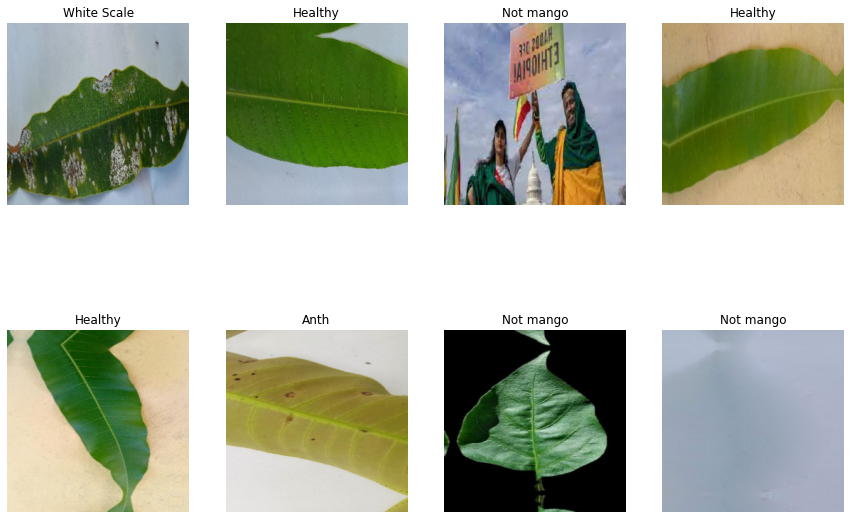

In [26]:
plt.figure(figsize=(15,16))
for image_batch,label_batch in train_generator:
    for i in range(8):
        plt.subplot(3,4,i+1)
        plt.imshow((image_batch[i]*255).astype(np.uint8)) 
        plt.title( class_names[int(label_batch[i])])
        plt.axis('off')
    break

### Build CNN model

In [27]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model =Sequential([
        InputLayer(input_shape=input_shape),


       Conv2D(32, (3,3),padding='same', activation='relu'),
         MaxPooling2D((2, 2)),

          Conv2D(64, (3,3),padding='same', activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(128, (3,3),padding='same', activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(256, (3,3), padding='same',activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(512, (3, 3),padding='same',activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(1024, (3, 3),padding='same',activation='relu'),
         MaxPooling2D((2, 2)),
         Dropout(0.5),

         Conv2D(1024, (3, 3),padding='same',activation='relu'),
         MaxPooling2D((2, 2)),
         Dropout(0.5),

         Flatten(),

         Dense(1024,activation='relu'),
         Dense(128,activation='relu'),

         Dense(64,activation='relu'),

         Dense(5,activation='softmax')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

### Early stopping

In [29]:
model_check_point=ModelCheckpoint(filepath="/content/drive/MyDrive/best_model.h5",
                   monitor="val_loss",
                   verbose=0,
                   save_best_only=True)
early_stop=EarlyStopping(monitor="val_accuracy",patience=30,verbose=1)
log_csv=CSVLogger('/content/drive/MyDrive/my_logs.csv',separator=',',append=False)
call_backs=[model_check_point,early_stop,log_csv]
opt = Adam(learning_rate=LR)

### Compile

In [30]:
model.compile(
optimizer=opt,
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])
print("[INFO] training network...")

[INFO] training network...


In [31]:
steps_per_epoch=int((train_generator.samples)/BATCH_SIZE)
validation_step=int((val_generator.samples)/BATCH_SIZE)
steps_per_epoch,validation_step

(196, 24)

### Train model

In [32]:
history=model.fit(
     train_generator,
     verbose=1,
     epochs=50,
     callbacks=call_backs,
     batch_size=BATCH_SIZE,
     validation_data=val_generator,
     steps_per_epoch=steps_per_epoch,
     validation_steps=validation_step
        
)

Epoch 1/50
196/196 [==============================] - 205s 956ms/step - loss: 1.3975 - accuracy: 0.3596 - val_loss: 1.1156 - val_accuracy: 0.4740
Epoch 2/50
196/196 [==============================] - 183s 932ms/step - loss: 0.9373 - accuracy: 0.5701 - val_loss: 1.0311 - val_accuracy: 0.5469
Epoch 3/50
196/196 [==============================] - 182s 930ms/step - loss: 0.7539 - accuracy: 0.6782 - val_loss: 0.6924 - val_accuracy: 0.6771
Epoch 4/50
196/196 [==============================] - 185s 941ms/step - loss: 0.5820 - accuracy: 0.7774 - val_loss: 0.5714 - val_accuracy: 0.7969
Epoch 5/50
196/196 [==============================] - 182s 927ms/step - loss: 0.3967 - accuracy: 0.8650 - val_loss: 0.4645 - val_accuracy: 0.8385
Epoch 6/50
196/196 [==============================] - 179s 913ms/step - loss: 0.3510 - accuracy: 0.8797 - val_loss: 0.7573 - val_accuracy: 0.8073
Epoch 7/50
196/196 [==============================] - 179s 917ms/step - loss: 0.2647 - accuracy: 0.9200 - val_loss: 0.3701 -

In [33]:
model.evaluate(test_generator)

25/25 [==============================] - 19s 777ms/step - loss: 0.4070 - accuracy: 0.9698


[0.40704038739204407, 0.9698492288589478]

## Accuracy-loss graph

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

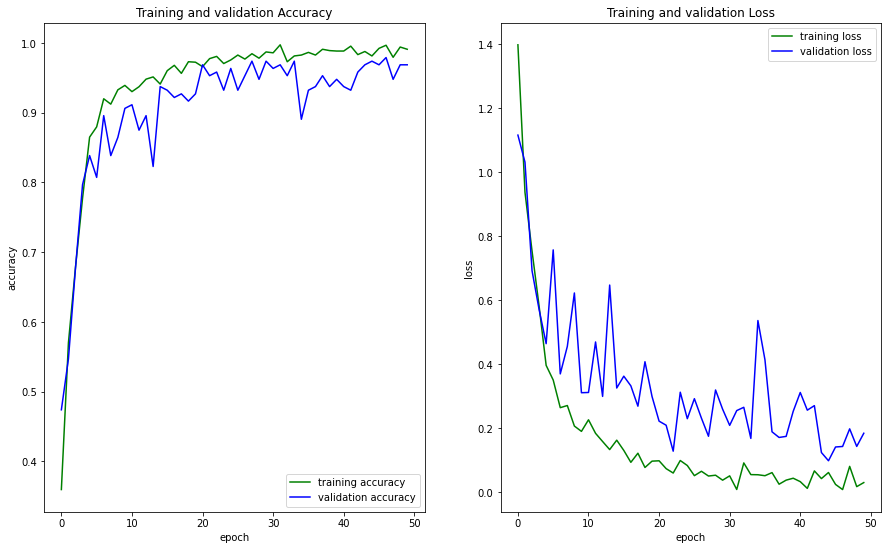

In [35]:
plt.figure(figsize=(15,9))
#accuracy graph
plt.subplot(1,2,1)
plt.plot(acc,'g',label='training accuracy')
plt.plot(val_acc,'b',label='validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and validation Accuracy')

#loss graph
plt.subplot(1,2,2)
plt.plot(loss,'g',label='training loss')
plt.plot(val_loss,'b',label='validation loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Training and validation Loss')
plt.show()

## Confusion matrix

25/25 [==============================] - 17s 690ms/step


<AxesSubplot:>

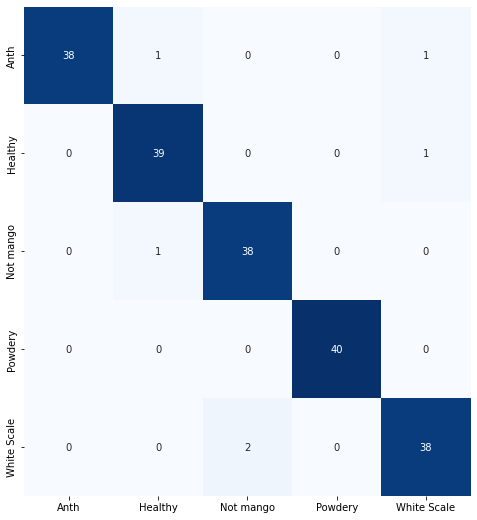

In [36]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

import sklearn.metrics as metrics

import seaborn as sns

y_pred = model.predict(test_generator)
plt.figure(figsize=(8,9))
y_prediction_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(test_generator.classes,y_prediction_labels)
sns.heatmap(cm,annot=True,cmap="Blues",cbar=False,fmt='d',xticklabels=class_names,yticklabels=class_names,)

## Classification report

In [37]:
Y_pred = model.predict(test_generator, test_generator.samples // BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')

print(classification_report(test_generator.classes, y_pred))

25/25 [==============================] - 21s 842ms/step
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.95      0.97      0.96        40
           2       0.95      0.97      0.96        39
           3       1.00      1.00      1.00        40
           4       0.95      0.95      0.95        40

    accuracy                           0.97       199
   macro avg       0.97      0.97      0.97       199
weighted avg       0.97      0.97      0.97       199



### Prediction

In [41]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)#create a batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 23ms/step


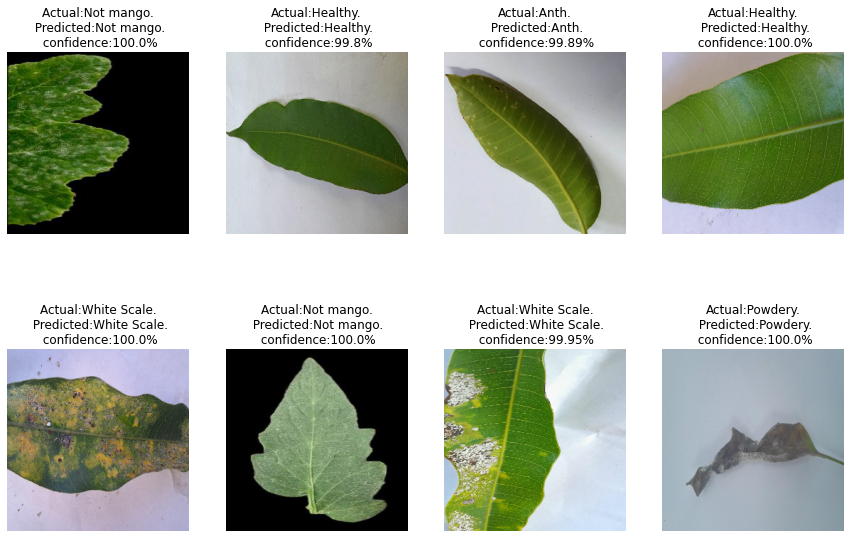

In [42]:
plt.figure(figsize=(15,10))
for images,labels in test_generator:
    for i in range (8):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        
        predicted_class,confidence=predict(model,images[i])
        actual_class=class_names[int(labels[i])]
        
        plt.title(f"Actual:{actual_class}.\n Predicted:{predicted_class}.\n confidence:{confidence}%")
        plt.axis('off')
    plt.show()
    break

### Save model

In [43]:
model.save('myModel.h5')

### Load model

In [44]:
my_model=load_model('myModel.h5')

In [45]:
my_model.evaluate(test_generator)

25/25 [==============================] - 18s 677ms/step - loss: 0.4070 - accuracy: 0.9698


[0.4070403277873993, 0.9698492288589478]

### Testing by loaded model

In [53]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)#create a batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 20ms/step


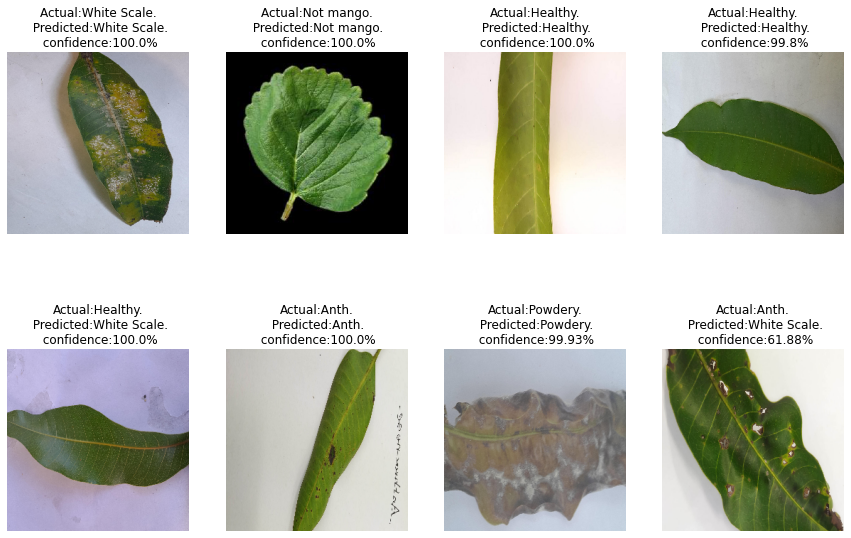

In [54]:
plt.figure(figsize=(15,10))
for images,labels in test_generator:
    for i in range (8):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        
        predicted_class,confidence=predict(my_model,images[i])
        actual_class=class_names[int(labels[i])]
        
        plt.title(f"Actual:{actual_class}.\n Predicted:{predicted_class}.\n confidence:{confidence}%")
        plt.axis('off')
    plt.show()
    break

### Quantization

In [46]:
!pip install tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 20.1 MB/s eta 0:00:00


### quantization aware

In [49]:
import tensorflow_model_optimization as tfmot
quantize_model = tfmot.quantization.keras.quantize_model
# q_aware stands for for quantization aware.
q_aware_model = quantize_model(my_model)

# quantize_model requires a recompile.
q_aware_model.compile(
            tf.keras.optimizers.Adam(learning_rate=LR),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_1 (QuantizeL  (None, 256, 256, 3)      3         
 ayer)                                                           
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 256, 256, 32)     963       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 128, 128, 32)     1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 128, 128, 64)     18627     
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 64, 64, 64)       1

In [50]:
# quantize_model requires a retrain.
q_aware_model.fit(train_generator,
                  batch_size=BATCH_SIZE,
                  validation_data=val_generator,
                  steps_per_epoch=steps_per_epoch,
                  validation_steps=validation_step,
                  epochs=4)

Epoch 1/4
196/196 [==============================] - 196s 976ms/step - loss: 0.0480 - accuracy: 0.9878 - val_loss: 0.3182 - val_accuracy: 0.9531
Epoch 2/4
196/196 [==============================] - 190s 967ms/step - loss: 0.0693 - accuracy: 0.9814 - val_loss: 0.1337 - val_accuracy: 0.9688
Epoch 3/4
196/196 [==============================] - 187s 953ms/step - loss: 0.0384 - accuracy: 0.9891 - val_loss: 0.3121 - val_accuracy: 0.9635
Epoch 4/4
196/196 [==============================] - 185s 941ms/step - loss: 0.0099 - accuracy: 0.9962 - val_loss: 0.3432 - val_accuracy: 0.9427


### Convert to tflite model

In [51]:
converter=tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_qaware=converter.convert()

/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


### save the tflite

In [52]:
with open("/content/drive/MyDrive/sem_proj/optimized_tflite_model.tflite", 'wb') as f:
    f.write(tflite_qaware)